# Shopify Data Science Internship Challenge:
Question 1: Given some sample data, write a program to answer the following: click here to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.
- AOV is the mean of the dollar amount of each order.  Taking the mean of a dataset leaves the result susceptible to outliers.  To better evaluate the data I would seek to better understand the dataset first through visualizations and then try a value that is less susceptible to outlier influence.

b. What metric would you report for this dataset?
- The metric I would report for this dataset would be the median order value as at this value 50% of the customers have a lower order amount and 50% have a higher order amount.

c. What is its value?
- Median Order Value = 284.00
- Confidence Interval 99% AOV = 723.26
- Confidence Interval 95% AOV = 702.75



In [30]:
# Import Libraries
import os
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [22]:
data = pd.read_csv('DS_Challenge_Data')
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [29]:
data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


<AxesSubplot:ylabel='order_amount'>

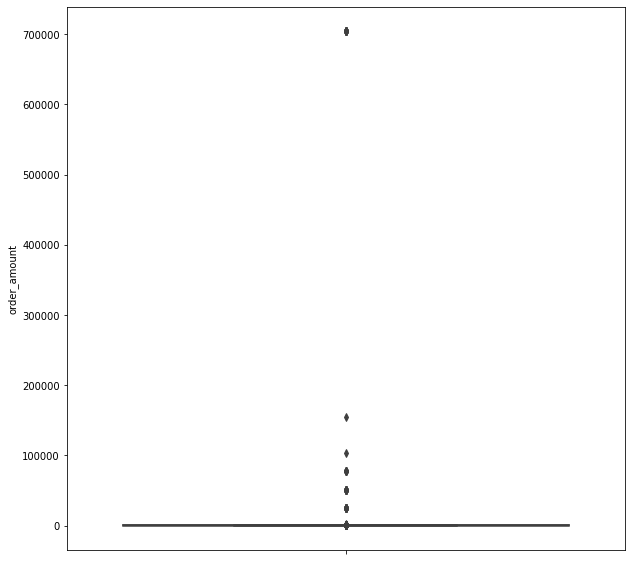

In [17]:
plt.figure(figsize=(10,10))
sn.boxplot(y='order_amount', data=data)

This dataset contains 5000 entries and the majority of them are concentrated around just above 0 with a handful of them being outliers and have significantly higher amount.  These were large orders and are not indicative of the average consumer.

#### How they calculated AOV

In [26]:
AOV = data['order_amount'].mean()
print('AOV: $%.2f' %AOV)

AOV: $3145.13


#### Median Order Value (MOV)

In [28]:
MOV = data['order_amount'].median()
print('MOV: $%.2f' %MOV)

MOV: $284.00


#### AOV After Removing Outliers

In [42]:
# Calculate Z Score for order_amount
zScore = np.abs(zscore(data['order_amount']))
# Remove Outliers for dataset (99% Confidence Interval)
orderAmount99 = data.drop(np.where(zScore > 3)[0], axis=0).reset_index(drop=True)['order_amount']

print('Results for 99% Confidence Interval')
# Calculate how many data entries were lost
print('# entries w/ p(z) > 3: ', len(np.where(zScore > 3)[0]))

# Calculate AOV with new dataset
AOV = orderAmount99.mean()
print('AOV: $%.2f' %AOV)

# Remove Outliers for dataset (99% Confidence Interval)
orderAmount95 = data.drop(np.where(zScore > 1.96)[0], axis=0).reset_index(drop=True)['order_amount']

print('\n\nResults for 95% Confidence Interval')
# Calculate how many data entries were lost
print('# entries w/ p(z) > 1.96: ', len(np.where(zScore > 1.96)[0]))

# Calculate AOV with new dataset
AOV = orderAmount95.mean()
print('AOV: $%.2f' %AOV)

Results for 99% Confidence Interval
# entries w/ p(z) > 3:  18
AOV: $723.26


Results for 95% Confidence Interval
# entries w/ p(z) > 1.96:  19
AOV: $702.75


Text(0.5, 1.0, '95% Confidence Interval')

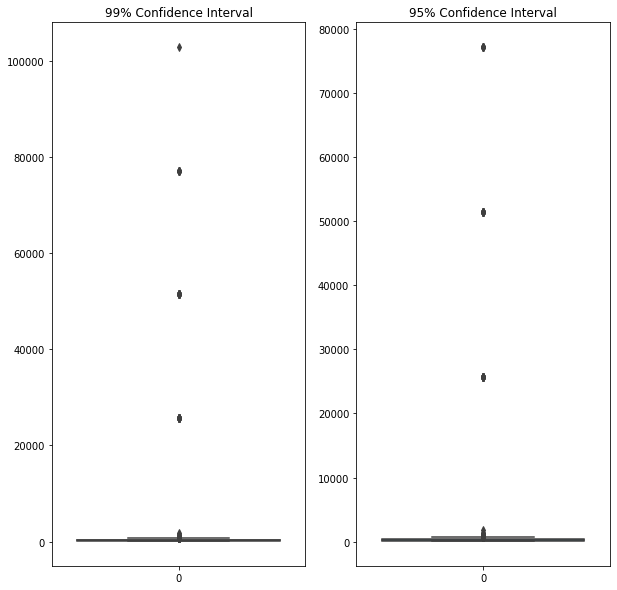

In [44]:
# Plot Data with Outliers removed
fig = plt.figure(figsize=(10,10))

# Plot example of a flip image
plt.subplot(1,2,1)
sn.boxplot(data=orderAmount99, orient='v')
plt.title('99% Confidence Interval')

# Plot example of a non flip image
plt.subplot(1,2,2)
sn.boxplot(data=orderAmount95, orient='v')
plt.title('95% Confidence Interval')